In [ ]:
!pip install yfinance

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import datetime
from sklearn.preprocessing import MinMaxScaler
stock_symbol = 'AAPL'
startDate = datetime.datetime(2020, 1, 1)

# endDate , as per our convenience we can modify
endDate = datetime.datetime(2020, 12, 31)

ticker = yf.Ticker(stock_symbol)
data = ticker.history(start=startDate, end=endDate)




In [ ]:
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-01-02 00:00:00-05:00,71.799881,72.856621,71.545395,72.796028,135480400,0.0,0.0
2020-01-03 00:00:00-05:00,72.020432,72.851761,71.862892,72.088295,146322800,0.0,0.0
2020-01-06 00:00:00-05:00,71.206055,72.701477,70.953987,72.662697,118387200,0.0,0.0
2020-01-07 00:00:00-05:00,72.672402,72.929314,72.100410,72.320969,108872000,0.0,0.0
2020-01-08 00:00:00-05:00,72.022865,73.787323,72.022865,73.484360,132079200,0.0,0.0


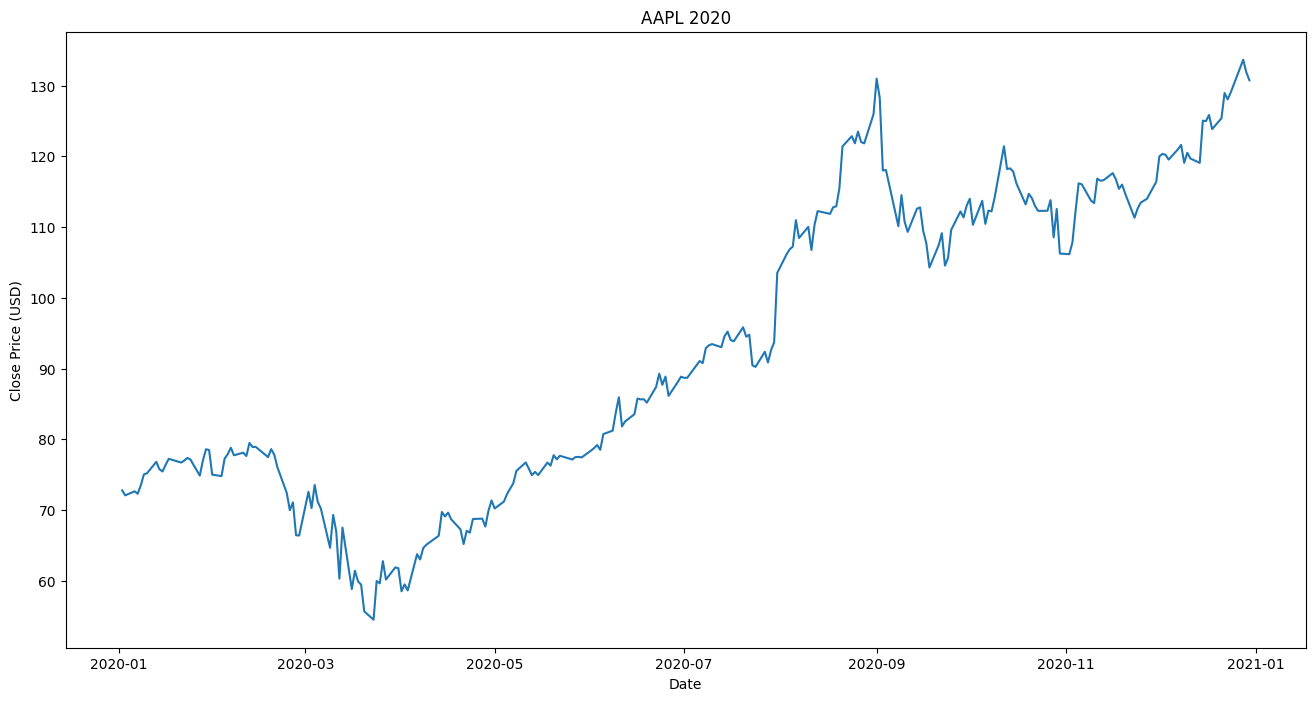

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.title('AAPL 2020')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.plot(data['Close'])
plt.show()

In [ ]:
close_price = data['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_close_price = scaler.fit_transform(close_price)
train_size = int(len(scaled_close_price) * 0.8)
train_data = scaled_close_price[:train_size]
test_data = scaled_close_price[train_size:]

In [ ]:
def create_lstm_data(data, time_steps=1):
  x, y = [], []
  for i in range(len(data) - time_steps):
    x.append(data[i:(i + time_steps), 0])
    y.append(data[i + time_steps, 0])
  return np.array(x), np.array(y)

In [ ]:
time_steps = 5
x_train, y_train = create_lstm_data(scaled_close_price,time_steps)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [ ]:
from keras.layers import Dense, LSTM
from keras.models import Sequential
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.fit(x_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.3268
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1321 
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0185 
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0262 
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0103 
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0123 
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0057 
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0051 
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0038 
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0029  
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0025 
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0027 
Epoch 13/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0024 
Epoch 14/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0026 
Epoch 15/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0022 
Epoch 16/50
8/8 ━━━━━━━━━━━━━━━━━━

In [ ]:
x_test,y_test = create_lstm_data(test_data,time_steps)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
from sklearn.metrics import mean_squared_error
predictions = model.predict(x_test)
real_predictions = scaler.inverse_transform(predictions)
real_y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

mse = mean_squared_error(real_y_test,real_predictions)

print(f'Mean Squared Error on Training Data: {mse}')


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
Mean Squared Error on Training Data: 11.444993301578203


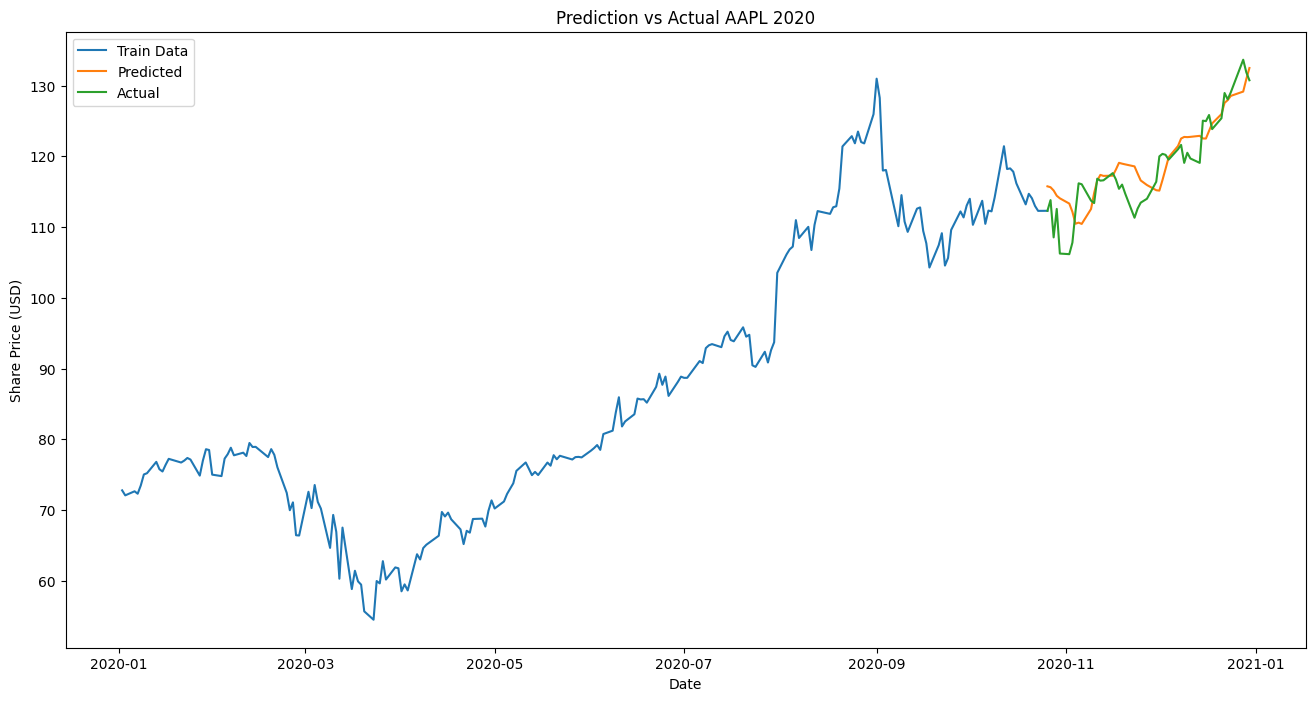

In [ ]:
plt.figure(figsize=(16, 8))  # Adjust figure size as needed
plt.title('Prediction vs Actual AAPL 2020')
plt.xlabel('Date')
plt.ylabel('Share Price (USD)')
plt.plot(data['Close'][:train_size+time_steps+1], label='Train Data')
plt.plot(data.index[train_size+time_steps:], real_predictions, label='Predicted')
plt.plot(data.index[train_size+time_steps:], real_y_test, label='Actual')
plt.legend()
plt.show()

In [ ]:
print(data.index[train_size + time_steps:])

DatetimeIndex(['2020-10-26 00:00:00-04:00', '2020-10-27 00:00:00-04:00',
               '2020-10-28 00:00:00-04:00', '2020-10-29 00:00:00-04:00',
               '2020-10-30 00:00:00-04:00', '2020-11-02 00:00:00-05:00',
               '2020-11-03 00:00:00-05:00', '2020-11-04 00:00:00-05:00',
               '2020-11-05 00:00:00-05:00', '2020-11-06 00:00:00-05:00',
               '2020-11-09 00:00:00-05:00', '2020-11-10 00:00:00-05:00',
               '2020-11-11 00:00:00-05:00', '2020-11-12 00:00:00-05:00',
               '2020-11-13 00:00:00-05:00', '2020-11-16 00:00:00-05:00',
               '2020-11-17 00:00:00-05:00', '2020-11-18 00:00:00-05:00',
               '2020-11-19 00:00:00-05:00', '2020-11-20 00:00:00-05:00',
               '2020-11-23 00:00:00-05:00', '2020-11-24 00:00:00-05:00',
               '2020-11-25 00:00:00-05:00', '2020-11-27 00:00:00-05:00',
               '2020-11-30 00:00:00-05:00', '2020-12-01 00:00:00-05:00',
               '2020-12-02 00:00:00-05:00', '2020-1